# Baseball Testing

In [70]:
import pandas as pd
import numpy as np
import requests
from rpy2.robjects import r, pandas2ri
import pyreadr
import matplotlib.pyplot as plt
from pandasql import sqldf
from bs4 import BeautifulSoup
from html_table_parser import HTMLTableParser
from selenium import webdriver
import time
from baseball_scraper import playerid_lookup
from unidecode import unidecode
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
# Setting up function for loading Rdata into python from Github Source

def git_load(Name):
    github_url = f'https://github.com/cdalzell/Lahman/raw/master/data/{Name}.RData'

    # Download the RData file
    response = requests.get(github_url)
    
    with open(f'{Name}.RData', 'wb') as f:
        f.write(response.content)
    
    result = pyreadr.read_r(f'{Name}.RData')
    print(result.keys())
    
    globals()[f'{Name}_df'] = result[f'{Name}']
    
# Setting up function to display the correlation in upper/lower triangle. Inspired by pair.panels in R

def corr_func(x, y, **kwargs):
    corr_value = x.corr(y)
    ax = plt.gca()
    ax.annotate(f'Corr: {corr_value:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes, ha='center', va='center', fontsize=15)
    
# Setting up function to split lists to equal length

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [3]:
# Calling all Tables from Github
table_names = ['People','Pitching', 'AwardsPlayers', 'AwardsSharePlayers', 'PitchingPost', 'Salaries', 'AllstarFull', 'SeriesPost', 'HallOfFame']
table_names

for x in table_names:
    git_load(x)

odict_keys(['People'])
odict_keys(['Pitching'])
odict_keys(['AwardsPlayers'])
odict_keys(['AwardsSharePlayers'])
odict_keys(['PitchingPost'])
odict_keys(['Salaries'])
odict_keys(['AllstarFull'])
odict_keys(['SeriesPost'])
odict_keys(['HallOfFame'])


## People dataframe

In [4]:
# People_df Exploration
People_df.info()
# print(People_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20676 entries, 0 to 20675
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   playerID      20676 non-null  object  
 1   birthYear     20567 non-null  object  
 2   birthMonth    20398 non-null  object  
 3   birthDay      20256 non-null  object  
 4   birthCountry  20617 non-null  object  
 5   birthState    20136 non-null  object  
 6   birthCity     20508 non-null  object  
 7   deathYear     10098 non-null  object  
 8   deathMonth    10097 non-null  object  
 9   deathDay      10096 non-null  object  
 10  deathCountry  10094 non-null  object  
 11  deathState    10038 non-null  object  
 12  deathCity     10089 non-null  object  
 13  nameFirst     20639 non-null  object  
 14  nameLast      20676 non-null  object  
 15  nameGiven     20639 non-null  object  
 16  weight        19864 non-null  object  
 17  height        19944 non-null  object  
 18  bats  

## Pitching Dataframe

In [5]:
# Pitching_df Exploration
Pitching_df.info()
#print(Pitching_df.describe())
#Pitching_df['yearID'] = pd.to_datetime(df['yearID'], format = '%Y')
Pitching_df.groupby('ERA')['yearID'].min()
Pitching_df[Pitching_df['ERA'].notnull()]['yearID'].min()
#Pitching_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50402 entries, 0 to 50401
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   playerID  50402 non-null  object  
 1   yearID    50402 non-null  int32   
 2   stint     50402 non-null  int32   
 3   teamID    50402 non-null  category
 4   lgID      50402 non-null  category
 5   W         50402 non-null  int32   
 6   L         50402 non-null  int32   
 7   G         50402 non-null  int32   
 8   GS        50402 non-null  int32   
 9   CG        50402 non-null  int32   
 10  SHO       50402 non-null  int32   
 11  SV        50402 non-null  int32   
 12  IPouts    50402 non-null  int32   
 13  H         50402 non-null  int32   
 14  ER        50402 non-null  int32   
 15  HR        50402 non-null  int32   
 16  BB        50402 non-null  int32   
 17  SO        50402 non-null  int32   
 18  BAOpp     45958 non-null  float64 
 19  ERA       50305 non-null  float64 
 20  IBB   

1871

In [6]:
print(Pitching_df[Pitching_df['IBB'].notnull()]['yearID'].min())
print(Pitching_df[Pitching_df['yearID'] == 1955].iloc[0])
# This gives all players max strikeouts in a year for their career.
# Pitching_df.groupby('playerID')['SO'].max()
# This gives all players mean and count strikeouts in a year for their career count is number of seasons.
# Pitching_df.groupby('playerID')['SO'].agg(['mean', 'count']) # can also provide max, min, and std

1955
playerID    aberal01
yearID          1955
stint              1
teamID           DET
lgID              AL
W                  6
L                  3
G                 39
GS                 1
CG                 0
SHO                0
SV                 3
IPouts           240
H                 86
ER                30
HR                 9
BB                28
SO                37
BAOpp           0.27
ERA             3.38
IBB                1
WP                 1
HBP                0
BK                 0
BFP              346
GF                22
R                 32
SH               NaN
SF               NaN
GIDP             NaN
Name: 14578, dtype: object


In [7]:
# joining debut into pitching df and then modifying the debut column
q = '''
SELECT
a.*,
b.debut
FROM
    Pitching_df a
LEFT JOIN
    People_df b
        on a.playerID = b.playerID
;
'''
Pitching_debut_df = sqldf(q, locals())
Pitching_debut_df['debut'] = Pitching_debut_df['debut'].astype(str).str[:4]
Pitching_debut_df.loc[Pitching_debut_df['debut'] == 'None']
Pitching_debut_df.replace('None', None, inplace = True)
Pitching_debut_df['debut'] = Pitching_debut_df['debut'].astype(np.int64)

In [8]:
# keeping all pitchers who have a debut date of greater than 1955
Pitching_1955 = Pitching_debut_df.loc[Pitching_debut_df['debut'] >= 1955]
Pitching_1955 = Pitching_1955.drop(columns=['SH', 'SF', 'GIDP', 'debut'])
len(Pitching_1955)

34532

In [9]:
# Grouping all the players together by sum or avg in my population
q = '''
SELECT
    playerID,
    sum(W) as W_tot,
    sum(L) as L_tot,
    sum(G) as G_tot,
    sum(GS) as GS_tot,
    sum(CG) as CG_tot,
    sum(SHO) as SHO_tot,
    sum(SV) as SV_tot,
    sum(IPouts) as IPouts_tot,
    sum(H) as H_tot,
    sum(ER) as ER_tot,
    sum(HR) as HR_tot,
    sum(BB) as BB_tot,
    sum(SO) as SO_tot,
    avg(BAOpp) as BAOpp_avg,
    avg(ERA) as ERA_avg,
    sum(IBB) as IBB_tot,
    sum(WP) as WP_tot,
    sum(HBP) as HBP_tot,
    sum(BK) as BK_tot,
    sum(BFP) as BFP_tot,
    sum(GF) as GF_tot,
    sum(R) as R_tot
FROM
    Pitching_1955
GROUP BY playerID
;
'''
Pitching_1955_player_career = sqldf(q, locals())
Pitching_1955_player_career

playerID  W_tot  L_tot  G_tot  GS_tot  CG_tot  SHO_tot  SV_tot  \
0     aardsda01     16     18    331       0       0        0      69   
1      aasedo01     66     60    448      91      22        5      82   
2      abadfe01      8     29    400       6       0        0       2   
3     abbotco01      0      5     23      10       0        0       0   
4     abbotgl01     62     83    248     206      37        5       0   
...         ...    ...    ...    ...     ...     ...      ...     ...   
6501   zitoba01    165    143    433     421      12        5       0   
6502  zobribe01      0      0      1       0       0        0       0   
6503  zuberty01      1      5     54       0       0        0       0   
6504  zumayjo01     13     12    171       0       0        0       5   
6505   zychto01      7      3     70       1       0        0       1   

      IPouts_tot  H_tot  ...  SO_tot  BAOpp_avg   ERA_avg  IBB_tot  WP_tot  \
0           1011    296  ...     340   0.257444  5.194444     22.0      12   
1           3328   1085  ...     641   0.250846  3.493077     45.0      22   
2           1045    332  ...     290   0.250364  4.219091     11.0      10   
3            196     64  ...      57   0.262500  6.000000      0.0       4   
4           3858   1405  ...     484   0.278583  4.331667     28.0      18   
...          ...    ...  ...     ...        ...       ...      ...     ...   
6501        7730   2381  ...    1885   0.256067  4.556000     52.0      50   
6502           3      0  ...       1   0.000000  0.000000      0.0       0   
6503         148     41  ...      55   0.223500  5.175000      2.0       3   
6504         629    169  ...     210   0.228600  3.442000     11.0      16   
6505         218     57  ...      80   0.218333  2.800000      5.0       2   

      HBP_tot  BK_tot  BFP_tot  GF_tot  R_tot  
0        16.0       1   1475.0     141    169  
1         7.0       3   4730.0     235    503  
2        12.0       2   1481.0     101    155  
3         5.0       0    298.0       9     45  
4        32.0       5   5508.0      13    707  
...       ...     ...      ...     ...    ...  
6501     97.0       8  11001.0       9   1254  
6502      0.0       0      5.0       1      0  
6503      2.0       0    222.0      14     31  
6504      4.0       0    911.0      35     80  
6505      8.0       1    309.0      14     24  

[6506 rows x 23 columns]

In [10]:
# looking at info
Pitching_1955_player_career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   playerID    6506 non-null   object 
 1   W_tot       6506 non-null   int64  
 2   L_tot       6506 non-null   int64  
 3   G_tot       6506 non-null   int64  
 4   GS_tot      6506 non-null   int64  
 5   CG_tot      6506 non-null   int64  
 6   SHO_tot     6506 non-null   int64  
 7   SV_tot      6506 non-null   int64  
 8   IPouts_tot  6506 non-null   int64  
 9   H_tot       6506 non-null   int64  
 10  ER_tot      6506 non-null   int64  
 11  HR_tot      6506 non-null   int64  
 12  BB_tot      6506 non-null   int64  
 13  SO_tot      6506 non-null   int64  
 14  BAOpp_avg   6505 non-null   float64
 15  ERA_avg     6501 non-null   float64
 16  IBB_tot     6506 non-null   float64
 17  WP_tot      6506 non-null   int64  
 18  HBP_tot     6506 non-null   float64
 19  BK_tot      6506 non-null  

In [11]:
# dropping 5 players due to them not having ERA and BAopp due to limited pitching in MLB.
drop_players = Pitching_1955_player_career['playerID'].loc[Pitching_1955_player_career['ERA_avg'].isnull()].tolist()
print(drop_players)
Pitching_1955_player_career = Pitching_1955_player_career[~Pitching_1955_player_career.playerID.isin(drop_players)]
Pitching_1955_player_career.info()

['bruckfr01', 'davalvi01', 'parrage01', 'sundigo01', 'yountla01']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6501 entries, 0 to 6505
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   playerID    6501 non-null   object 
 1   W_tot       6501 non-null   int64  
 2   L_tot       6501 non-null   int64  
 3   G_tot       6501 non-null   int64  
 4   GS_tot      6501 non-null   int64  
 5   CG_tot      6501 non-null   int64  
 6   SHO_tot     6501 non-null   int64  
 7   SV_tot      6501 non-null   int64  
 8   IPouts_tot  6501 non-null   int64  
 9   H_tot       6501 non-null   int64  
 10  ER_tot      6501 non-null   int64  
 11  HR_tot      6501 non-null   int64  
 12  BB_tot      6501 non-null   int64  
 13  SO_tot      6501 non-null   int64  
 14  BAOpp_avg   6501 non-null   float64
 15  ERA_avg     6501 non-null   float64
 16  IBB_tot     6501 non-null   float64
 17  WP_tot      6501 non-null   int64  
 18  HB

In [12]:
# table to be used in analysis and modeling
Pitching_1955_player_career

playerID  W_tot  L_tot  G_tot  GS_tot  CG_tot  SHO_tot  SV_tot  \
0     aardsda01     16     18    331       0       0        0      69   
1      aasedo01     66     60    448      91      22        5      82   
2      abadfe01      8     29    400       6       0        0       2   
3     abbotco01      0      5     23      10       0        0       0   
4     abbotgl01     62     83    248     206      37        5       0   
...         ...    ...    ...    ...     ...     ...      ...     ...   
6501   zitoba01    165    143    433     421      12        5       0   
6502  zobribe01      0      0      1       0       0        0       0   
6503  zuberty01      1      5     54       0       0        0       0   
6504  zumayjo01     13     12    171       0       0        0       5   
6505   zychto01      7      3     70       1       0        0       1   

      IPouts_tot  H_tot  ...  SO_tot  BAOpp_avg   ERA_avg  IBB_tot  WP_tot  \
0           1011    296  ...     340   0.257444  5.194444     22.0      12   
1           3328   1085  ...     641   0.250846  3.493077     45.0      22   
2           1045    332  ...     290   0.250364  4.219091     11.0      10   
3            196     64  ...      57   0.262500  6.000000      0.0       4   
4           3858   1405  ...     484   0.278583  4.331667     28.0      18   
...          ...    ...  ...     ...        ...       ...      ...     ...   
6501        7730   2381  ...    1885   0.256067  4.556000     52.0      50   
6502           3      0  ...       1   0.000000  0.000000      0.0       0   
6503         148     41  ...      55   0.223500  5.175000      2.0       3   
6504         629    169  ...     210   0.228600  3.442000     11.0      16   
6505         218     57  ...      80   0.218333  2.800000      5.0       2   

      HBP_tot  BK_tot  BFP_tot  GF_tot  R_tot  
0        16.0       1   1475.0     141    169  
1         7.0       3   4730.0     235    503  
2        12.0       2   1481.0     101    155  
3         5.0       0    298.0       9     45  
4        32.0       5   5508.0      13    707  
...       ...     ...      ...     ...    ...  
6501     97.0       8  11001.0       9   1254  
6502      0.0       0      5.0       1      0  
6503      2.0       0    222.0      14     31  
6504      4.0       0    911.0      35     80  
6505      8.0       1    309.0      14     24  

[6501 rows x 23 columns]

## Awards Players Dataframe

In [13]:
# AwardsPlayers_df Exploration
AwardsPlayers_df.info()
print(AwardsPlayers_df.describe())
AwardsPlayers_df.loc[~AwardsPlayers_df["tie"].isna()]
AwardsPlayers_df["awardID"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6531 entries, 0 to 6530
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   playerID  6531 non-null   object  
 1   awardID   6531 non-null   object  
 2   yearID    6531 non-null   int32   
 3   lgID      6527 non-null   category
 4   tie       53 non-null     object  
 5   notes     4999 non-null   object  
dtypes: category(1), int32(1), object(4)
memory usage: 236.3+ KB
            yearID
count  6531.000000
mean   1971.924208
std      32.107723
min    1877.000000
25%    1944.000000
50%    1978.000000
75%    1999.000000
max    2021.000000


array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award',
       'Rolaids Relief Man Award', 'NLCS MVP', 'ALCS MVP',
       'Silver Slugger', 'Branch Rickey Award', 'Hank Aaron Award',
       'TSN Reliever of the Year', 'Comeback Player of the Year',
       'Outstanding DH Award', 'Reliever of the Year Award',
       'SIlver Slugger'], dtype=object)

In [14]:
# Setting up from population of players those who had awards and only keeping those awards that contribute to a players career without being repetitive (limiting amount of awards).
q = '''
SELECT 
a.playerID,
count(*) as award_count
FROM 
    AwardsPlayers_df a
INNER JOIN
    Pitching_1955_player_career b
        on a.playerID = b.playerID
Where awardID in (
                    'Pitching Triple Crown',
                    'Triple Crown',
                    'Most Valuable Player',
                    'Rookie of the Year',
                    'Babe Ruth Award',
                    'World Series MVP',
                    'Cy Young Award',
                    'Gold Glove',
                    'All-Star Game MVP',
                    'Roberto Clemente Award',
                    'Rolaids Relief Man Award',
                    'NLCS MVP',
                    'ALCS MVP',
                    'Silver Slugger',
                    'Hank Aaron Award',
                    'Comeback Player of the Year',
                    'Outstanding DH Award',
                    'Reliever of the Year Award',
                    'SIlver Slugger'
                )
GROUP BY
a.playerID
;
'''

Pitching_1955_awards = sqldf(q, locals())
# table to be used in analysis and modeling
Pitching_1955_awards

playerID  award_count
0    alfonan01            1
1    andujjo01            1
2    arrieja01            2
3    arroybr01            1
4    averyst01            1
..         ...          ...
277  youngch03            1
278  zachrpa01            1
279  zambrca01            3
280   zitoba01            1
281  zobribe01            1

[282 rows x 2 columns]

## Awards Share Players Dataframe

In [15]:
# AwardsSharePlayers_df Exploration
# AwardsSharePlayers_df.info()
print(AwardsSharePlayers_df.describe())
print(AwardsSharePlayers_df['awardID'].unique())
AwardsSharePlayers_df.loc[AwardsSharePlayers_df['awardID'] == 'Cy Young']

            yearID    pointsWon    pointsMax   votesFirst
count  6879.000000  6879.000000  6879.000000  6521.000000
mean   1972.461259    43.559674   267.518389     1.624751
std      27.707848    68.265957   128.988138     4.911428
min    1911.000000     0.000000    16.000000     0.000000
25%    1950.000000     4.000000   140.000000     0.000000
50%    1975.000000    12.000000   336.000000     0.000000
75%    1996.000000    53.000000   336.000000     0.000000
max    2016.000000   448.000000   448.000000    32.000000
['Cy Young' 'MVP' 'Rookie of the Year']


awardID  yearID lgID   playerID  pointsWon  pointsMax  votesFirst
0     Cy Young    1956   ML   fordwh01        1.0         16         1.0
1     Cy Young    1956   ML  maglisa01        4.0         16         4.0
2     Cy Young    1956   ML  newcodo01       10.0         16        10.0
3     Cy Young    1956   ML  spahnwa01        1.0         16         1.0
4     Cy Young    1957   ML  donovdi01        1.0         16         1.0
...        ...     ...  ...        ...        ...        ...         ...
6859  Cy Young    2016   NL  cuetojo01       19.0        210         0.0
6860  Cy Young    2016   NL  fernajo02       18.0        210         0.0
6861  Cy Young    2016   NL  syndeno01       15.0        210         0.0
6862  Cy Young    2016   NL  arrieja01        2.0        210         0.0
6863  Cy Young    2016   NL  roarkta01        1.0        210         0.0

[785 rows x 7 columns]

In [16]:
# soup = BeautifulSoup(requests.get(f'https://www.baseball-reference.com/awards/awards_2021.shtml').text.replace('<!--','').replace('-->',''))
# soup#.find_all('data-append-csv')



# id_value = soup.find('td', {'data-append-csv': True})['data-append-csv']
# id_value

# mvp_table_headers = table.find_all('th')
# mvp_table_headers

# TAKING TEXT FROM EACH OF THESE LOOPING GETTING ALL HEADER NAMES FROM THE TABLE
# mvp_table_headers = [title.text for title in mvp_table_headers]
#print(mvp_table_headers) # need to clean up
# mvp_table_headers = mvp_table_headers[6:36]
# df = pd.DataFrame(columns = mvp_table_headers)

# column_data = table.find_all('tr')
# table.find_all('tr')[2]

# for row in column_data[2:]: # starting at position one
#     row_data = row.find_all('td')
#     individual_row_data = [data.text.strip() for data in row_data]
#     length = len(df)
#     df.loc[length] = individual_row_data 
# row_data

In [17]:
# Web Scraping to get mvp, CY Young, and ROY results and votes for seasons after 2016
seasons = ['2017', '2018', '2019', '2020', '2021', '2022']
mvp_tables = [0,1]
cy_tables = [2,3]
roy_tables = [4,5]



for x in seasons:
    soup = BeautifulSoup(
            requests.get(f'https://www.baseball-reference.com/awards/awards_{x}.shtml').text.replace('<!--','').replace('-->','')
    ) # some tables are hidden in comments
    
    for y in mvp_tables:
        table = soup.find_all('table')[y]

        mvp_table_headers = table.find_all('th')
        mvp_table_headers

        # TAKING TEXT FROM EACH OF THESE LOOPING GETTING ALL HEADER NAMES FROM THE TABLE
        mvp_table_headers = [title.text for title in mvp_table_headers]
        #print(mvp_table_headers) # need to clean up
        mvp_table_headers = mvp_table_headers[6:36]
        df = pd.DataFrame(columns = mvp_table_headers)
        column_data = table.find_all('tr')
        # table.find_all('tr')[2]
        ids = []
        
        for row in column_data[2:]: # starting at position one
            row_data = row.find_all('td')
            id_value = row.find('td', {'data-append-csv': True})['data-append-csv']
            ids.append(id_value)
            individual_row_data = [data.text.strip() for data in row_data]
            length = len(df)
            df.loc[length] = individual_row_data 

        # removing the \n in the 10th column name
        df.columns = [c.replace("\n", "") for c in df.columns]
        df['playerID'] = ids
        globals()[f'mvp_{y}_{x}'] = df
        print(f'mvp_{y}_{x}')
        
    for y in cy_tables:
        table = soup.find_all('table')[y]

        cy_table_headers = table.find_all('th')
        cy_table_headers

        # TAKING TEXT FROM EACH OF THESE LOOPING GETTING ALL HEADER NAMES FROM THE TABLE
        cy_table_headers = [title.text for title in cy_table_headers]
        #print(cy_table_headers) # need to clean up
        cy_table_headers = cy_table_headers[1:31]
        df = pd.DataFrame(columns = cy_table_headers)

        column_data = table.find_all('tr')
        column_data[1]
        ids = []

        for row in column_data[1:]: # starting at position one
            row_data = row.find_all('td')
            id_value = row.find('td', {'data-append-csv': True})['data-append-csv']
            ids.append(id_value)
            individual_row_data = [data.text.strip() for data in row_data]
            length = len(df)
            df.loc[length] = individual_row_data 
        df['playerID'] = ids
        globals()[f'cy_{y}_{x}'] = df
        print(f'cy_{y}_{x}')
    
    for y in roy_tables:
        table = soup.find_all('table')[y]

        roy_table_headers = table.find_all('th')
        roy_table_headers

        # TAKING TEXT FROM EACH OF THESE LOOPING GETTING ALL HEADER NAMES FROM THE TABLE
        roy_table_headers = [title.text for title in roy_table_headers]
        #print(roy_table_headers) # need to clean up
        roy_table_headers = roy_table_headers[6:36]
        df = pd.DataFrame(columns = roy_table_headers)
        df

        column_data = table.find_all('tr')
        column_data[1]
        ids = []

        for row in column_data[2:]: # starting at position one
            row_data = row.find_all('td')
            id_value = row.find('td', {'data-append-csv': True})['data-append-csv']
            ids.append(id_value)
            individual_row_data = [data.text.strip() for data in row_data]
            length = len(df)
            df.loc[length] = individual_row_data 
        df['playerID'] = ids
        globals()[f'roy_{y}_{x}'] = df
        print(f'roy_{y}_{x}')


mvp_0_2017
mvp_1_2017
cy_2_2017
cy_3_2017
roy_4_2017
roy_5_2017
mvp_0_2018
mvp_1_2018
cy_2_2018
cy_3_2018
roy_4_2018
roy_5_2018
mvp_0_2019
mvp_1_2019
cy_2_2019
cy_3_2019
roy_4_2019
roy_5_2019
mvp_0_2020
mvp_1_2020
cy_2_2020
cy_3_2020
roy_4_2020
roy_5_2020
mvp_0_2021
mvp_1_2021
cy_2_2021
cy_3_2021
roy_4_2021
roy_5_2021
mvp_0_2022
mvp_1_2022
cy_2_2022
cy_3_2022
roy_4_2022
roy_5_2022


In [18]:
# Concating mvp tables

NL_mvp_tables = [1]
for y in seasons:
    for x in NL_mvp_tables:
        locals().get(f"mvp_{x}_{y}")['lgID'] = 'NL' 
        
AL_mvp_tables = [0]
for y in seasons:
    for x in AL_mvp_tables:
        locals().get(f"mvp_{x}_{y}")['lgID'] = 'AL' 

for y in seasons:
    for x in mvp_tables:
        locals().get(f"mvp_{x}_{y}")['yearID'] = f'{y}' 
#         current_df = locals().get(f"mvp_{x}_{y}")
#         mvp_award_shares = mvp_award_shares.union(current_df)



mvp_award_shares = pd.concat([mvp_0_2017,
                                  mvp_1_2017, 
                                  mvp_0_2018, 
                                  mvp_1_2018,
                                  mvp_0_2019,
                                  mvp_1_2019,
                                  mvp_0_2020,
                                  mvp_1_2020,
                                  mvp_0_2021,
                                  mvp_1_2021,
                                  mvp_0_2022,
                                  mvp_1_2022,
                                 ])

mvp_award_shares['pointsMax'] = 420
mvp_award_shares['awardID'] = "MVP"
mvp_award_shares.drop(mvp_award_shares.iloc[:, 4:30].columns, axis=1, inplace= True)
#mvp_award_shares.info()
mvp_award_shares.rename(columns={'Vote Pts':'pointsWon', '1st Place':'votesFirst'}, inplace=True)
mvp_award_shares = mvp_award_shares[['awardID', 'yearID', 'lgID', 'playerID', 'pointsWon', 'pointsMax', 'votesFirst']]
#mvp_award_shares


In [19]:
# Concating mvp tables

NL_cy_tables = [3]
for y in seasons:
    for x in NL_cy_tables:
        locals().get(f"cy_{x}_{y}")['lgID'] = 'NL' 
        
AL_cy_tables = [2]
for y in seasons:
    for x in AL_cy_tables:
        locals().get(f"cy_{x}_{y}")['lgID'] = 'AL' 

for y in seasons:
    for x in cy_tables:
        locals().get(f"cy_{x}_{y}")['yearID'] = f'{y}' 
#         current_df = locals().get(f"cy_{x}_{y}")
#         cy_award_shares = cy_award_shares.union(current_df)



cy_award_shares = pd.concat([cy_2_2017,
                                  cy_3_2017, 
                                  cy_2_2018, 
                                  cy_3_2018,
                                  cy_2_2019,
                                  cy_3_2019,
                                  cy_2_2020,
                                  cy_3_2020,
                                  cy_2_2021,
                                  cy_3_2021,
                                  cy_2_2022,
                                  cy_3_2022,
                                 ])

cy_award_shares['pointsMax'] = 210
cy_award_shares['awardID'] = "Cy Young"
cy_award_shares.drop(cy_award_shares.iloc[:, 4:30].columns, axis=1, inplace= True)
#cy_award_shares.info()
cy_award_shares.rename(columns={'Vote Pts':'pointsWon', '1st Place':'votesFirst'}, inplace=True)
cy_award_shares = cy_award_shares[['awardID', 'yearID', 'lgID', 'playerID', 'pointsWon', 'pointsMax', 'votesFirst']]
#cy_award_shares


In [20]:
# Concating Roy tables

NL_roy_tables = [5]
for y in seasons:
    for x in NL_roy_tables:
        locals().get(f"roy_{x}_{y}")['lgID'] = 'NL' 
        
AL_roy_tables = [4]
for y in seasons:
    for x in AL_roy_tables:
        locals().get(f"roy_{x}_{y}")['lgID'] = 'AL' 

for y in seasons:
    for x in roy_tables:
        locals().get(f"roy_{x}_{y}")['yearID'] = f'{y}' 
#         current_df = locals().get(f"roy_{x}_{y}")
#         roy_award_shares = roy_award_shares.union(current_df)



roy_award_shares = pd.concat([roy_5_2017,
                                  roy_4_2017, 
                                  roy_5_2018, 
                                  roy_4_2018,
                                  roy_5_2019,
                                  roy_4_2019,
                                  roy_5_2020,
                                  roy_4_2020,
                                  roy_5_2021,
                                  roy_4_2021,
                                  roy_5_2022,
                                  roy_4_2022,
                                 ])

roy_award_shares['pointsMax'] = 420
roy_award_shares['awardID'] = "Rookie of the Year"
roy_award_shares.drop(roy_award_shares.iloc[:, 4:30].columns, axis=1, inplace= True)
#roy_award_shares.info()
roy_award_shares.rename(columns={'Vote Pts':'pointsWon', '1st Place':'votesFirst'}, inplace=True)
roy_award_shares = roy_award_shares[['awardID', 'yearID', 'lgID', 'playerID', 'pointsWon', 'pointsMax', 'votesFirst']]
#roy_award_shares


In [21]:
# Concating all tables
combined_award_shares = pd.concat([mvp_award_shares,cy_award_shares,roy_award_shares])
combined_award_shares

# And finally Concating to main AwardsSharePlayers_df
AwardsSharePlayers_df = pd.concat([AwardsSharePlayers_df, combined_award_shares])
AwardsSharePlayers_df[['yearID', 'pointsWon', 'votesFirst']] = AwardsSharePlayers_df[['yearID', 'pointsWon', 'votesFirst']].apply(pd.to_numeric)
print(AwardsSharePlayers_df.dtypes)
len(AwardsSharePlayers_df)
AwardsSharePlayers_df

awardID        object
yearID          int64
lgID           object
playerID       object
pointsWon     float64
pointsMax       int64
votesFirst    float64
dtype: object


awardID  yearID lgID   playerID  pointsWon  pointsMax  \
0             Cy Young    1956   ML   fordwh01        1.0         16   
1             Cy Young    1956   ML  maglisa01        4.0         16   
2             Cy Young    1956   ML  newcodo01       10.0         16   
3             Cy Young    1956   ML  spahnwa01        1.0         16   
4             Cy Young    1957   ML  donovdi01        1.0         16   
..                 ...     ...  ...        ...        ...        ...   
1   Rookie of the Year    2022   AL  rutscad01       68.0        420   
2   Rookie of the Year    2022   AL   kwanst01       44.0        420   
3   Rookie of the Year    2022   AL   wittbo02        7.0        420   
4   Rookie of the Year    2022   AL   penaje02        2.0        420   
5   Rookie of the Year    2022   AL  kirbyge01        1.0        420   

    votesFirst  
0          1.0  
1          4.0  
2         10.0  
3          1.0  
4          1.0  
..         ...  
1          1.0  
2          0.0  
3          0.0  
4          0.0  
5          0.0  

[7361 rows x 7 columns]

In [22]:
q = '''
SELECT 
a.awardID,
a.playerID,
sum(a.pointsWon) as pointsWon_tot
FROM 
    AwardsSharePlayers_df a
INNER JOIN
    Pitching_1955_player_career b
        on a.playerID = b.playerID
GROUP BY
a.awardID,
a.playerID
;
'''
AwardsSharePlayers_career_df = sqldf(q, locals())
AwardsSharePlayers_career_df

awardID   playerID  pointsWon_tot
0               Cy Young  abbotji01           26.0
1               Cy Young  alcansa01          210.0
2               Cy Young  alexado01           13.0
3               Cy Young  alvarhe01            1.0
4               Cy Young  andujjo01           19.0
...                  ...        ...            ...
1223  Rookie of the Year  zachrpa01           11.0
1224  Rookie of the Year  zeileto01            4.0
1225  Rookie of the Year  zieglbr01            1.0
1226  Rookie of the Year  zimmeje02           27.0
1227  Rookie of the Year   zitoba01            1.0

[1228 rows x 3 columns]

In [23]:
# pivoting the AwardsSharePlayers_career_df table
AwardsSharePlayers_career_df_pivot = AwardsSharePlayers_career_df.pivot(index= 'playerID', columns= 'awardID', values= 'pointsWon_tot')
AwardsSharePlayers_career_df_pivot.reset_index(inplace=True)
AwardsSharePlayers_career_df_pivot = AwardsSharePlayers_career_df_pivot.rename_axis(None, axis=1)
AwardsSharePlayers_career_df_pivot.fillna(0, inplace=True)
# table to be used in analysis and modeling
AwardsSharePlayers_career_df_pivot = AwardsSharePlayers_career_df_pivot.rename(columns={'Cy Young': 'CYY_totvotes', 'MVP': 'MVP_totvotes', 'Rookie of the Year':'ROY_totvotes'})
AwardsSharePlayers_career_df_pivot

playerID  CYY_totvotes  MVP_totvotes  ROY_totvotes
0    abbotji01          26.0           0.0          10.0
1    abernte02           0.0           8.0           0.0
2    affelje01           0.0           1.0           0.0
3    aguilri01           0.0          11.0           0.0
4    aguirha01           0.0          10.0           0.0
..         ...           ...           ...           ...
801  zieglbr01           0.0           0.0           1.0
802  zimmeje02           0.0           0.0          27.0
803  zimmejo02          46.0           0.0           0.0
804   zitoba01         114.0          24.0           1.0
805  zobribe01           0.0          48.0           0.0

[806 rows x 4 columns]

## Pitching Post Dataframe

In [24]:
# PitchingPost_df Exploration
#PitchingPost_df.info()
PitchingPost_df.describe()
#PitchingPost_df

yearID            W            L            G           GS  \
count  6538.000000  6538.000000  6538.000000  6538.000000  6538.000000   
mean   1994.493423     0.275925     0.275925     1.910370     0.553686   
std      27.699529     0.536025     0.512984     1.015821     0.779072   
min    1884.000000     0.000000     0.000000     1.000000     0.000000   
25%    1984.000000     0.000000     0.000000     1.000000     0.000000   
50%    2003.000000     0.000000     0.000000     2.000000     0.000000   
75%    2014.000000     0.000000     0.000000     2.000000     1.000000   
max    2022.000000     4.000000     4.000000     8.000000     8.000000   

                CG          SHO           SV       IPouts            H  \
count  6538.000000  6538.000000  6538.000000  6538.000000  6538.000000   
mean      0.101101     0.021872     0.105231    14.865402     4.481646   
std       0.428839     0.153423     0.409016    14.331376     4.483824   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     5.000000     1.000000   
50%       0.000000     0.000000     0.000000    11.000000     3.000000   
75%       0.000000     0.000000     0.000000    19.000000     6.000000   
max       8.000000     3.000000     4.000000   213.000000    64.000000   

                ER           HR           BB           SO        BAOpp  \
count  6538.000000  6538.000000  6538.000000  6538.000000  6466.000000   
mean      1.968492     0.495106     1.765831     3.798868     0.246959   
std       2.258413     0.794499     1.947313     3.801212     0.167579   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     1.000000     0.146000   
50%       1.000000     0.000000     1.000000     3.000000     0.235000   
75%       3.000000     1.000000     3.000000     5.000000     0.333000   
max      26.000000     5.000000    32.000000    35.000000     1.000000   

           ERA           GF            R  
count  6503.00  6538.000000  6538.000000  
mean       inf     0.452585     2.225757  
std        NaN     0.815165     2.636013  
min       0.00     0.000000     0.000000  
25%       0.00     0.000000     0.000000  
50%       2.70     0.000000     1.000000  
75%       6.35     1.000000     3.000000  
max        inf     6.000000    36.000000

In [25]:
# Setting up from population of players those who had postseason appearances
q = '''
SELECT 
a.*
FROM 
    PitchingPost_df a
INNER JOIN
    Pitching_1955_player_career b
        on a.playerID = b.playerID
;
'''
Pitching_1955_post_player = sqldf(q, locals())

# dropping players who had null ERA or BAOpp due to limited innings pitched
drop_players = Pitching_1955_post_player['playerID'].loc[Pitching_1955_post_player['ERA'].isnull() | Pitching_1955_post_player['BAOpp'].isnull()].tolist()
# drop_players[['playerID','ERA', 'BAOpp']]
print(drop_players)
Pitching_1955_post_player = Pitching_1955_post_player[~Pitching_1955_post_player.playerID.isin(drop_players)]
# Pitching_1955_post_player.info()

['richepe01', 'hamilda01', 'zachach02', 'watted01', 'poledi01', 'roberda05', 'agostju01', 'lavelga01', 'klinkjo01', 'vosbeed01', 'mormaal01', 'milletr02', 'reedst01', 'chrisja01', 'nelsoje01', 'klinest02', 'marteda01', 'myersmi01', 'eyresc01', 'fultzaa01', 'lopezja02', 'speiery01', 'milletr02', 'bastaan01', 'marteda01', 'durbich01', 'howeljp01', 'mcgeeja01', 'durbich01', 'porceri01', 'porceri01', 'freemsa01', 'hammeja01', 'delarjo01', 'martich02', 'garream01', 'fairbpe01']


In [26]:
# Grouping all the postseason players together by sum or avg in my population
q = '''
SELECT
playerID,
    sum(W) as W_post_tot,
    sum(L) as L_post_tot,
    sum(G) as G_post_tot,
    sum(GS) as GS_post_tot,
    sum(CG) as CG_post_tot,
    sum(SHO) as SHO_post_tot,
    sum(SV) as SV_post_tot,
    sum(IPouts) as IPouts_post_tot,
    sum(H) as H_post_tot,
    sum(ER) as ER_post_tot,
    sum(HR) as HR_post_tot,
    sum(BB) as BB_post_tot,
    sum(SO) as SO_post_tot,
    avg(BAOpp) as BAOpp_post_avg,
    avg(ERA) as ERA_post_avg,
    sum(IBB) as IBB_post_tot,
    sum(WP) as QP_post_tot,
    sum(HBP) as HBP_post_tot,
    sum(BK) as BK_post_tot,
    sum(BFP) as BFP_post_tot,
    sum(GF) as GF_post_tot,
    sum(R) as R_post_tot
FROM
    Pitching_1955_post_player
GROUP BY playerID
;
'''

Pitching_1955_post_player_career = sqldf(q, locals())
# table to be used in analysis and modeling
Pitching_1955_post_player_career
Pitching_1955_post_player_career.columns.tolist()

['playerID',
 'W_post_tot',
 'L_post_tot',
 'G_post_tot',
 'GS_post_tot',
 'CG_post_tot',
 'SHO_post_tot',
 'SV_post_tot',
 'IPouts_post_tot',
 'H_post_tot',
 'ER_post_tot',
 'HR_post_tot',
 'BB_post_tot',
 'SO_post_tot',
 'BAOpp_post_avg',
 'ERA_post_avg',
 'IBB_post_tot',
 'QP_post_tot',
 'HBP_post_tot',
 'BK_post_tot',
 'BFP_post_tot',
 'GF_post_tot',
 'R_post_tot']

## Allstar Dataframe

In [27]:
# AllstarFull_df Exploration
AllstarFull_df.info()
print(AllstarFull_df.describe())
AllstarFull_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   playerID     5516 non-null   object  
 1   yearID       5516 non-null   int32   
 2   gameNum      5516 non-null   int32   
 3   gameID       5467 non-null   object  
 4   teamID       5516 non-null   category
 5   lgID         5516 non-null   category
 6   GP           5516 non-null   int32   
 7   startingPos  1731 non-null   object  
dtypes: category(2), int32(3), object(3)
memory usage: 206.3+ KB
            yearID      gameNum           GP
count  5516.000000  5516.000000  5516.000000
mean   1979.730421     0.094996     0.782088
std      25.462361     0.389393     0.412864
min    1933.000000     0.000000     0.000000
25%    1959.000000     0.000000     1.000000
50%    1980.000000     0.000000     1.000000
75%    2003.000000     0.000000     1.000000
max    2022.000000     2.000000     1.0

playerID  yearID  gameNum        gameID teamID lgID  GP startingPos
0     gomezle01    1933        0  ALS193307060    NYA   AL   1           1
1     ferreri01    1933        0  ALS193307060    BOS   AL   1           2
2     gehrilo01    1933        0  ALS193307060    NYA   AL   1           3
3     gehrich01    1933        0  ALS193307060    DET   AL   1           4
4     dykesji01    1933        0  ALS193307060    CHA   AL   1           5
...         ...     ...      ...           ...    ...  ...  ..         ...
5511  rileyau01    2022        0  NLS202207190    ATL   NL   1         NaN
5512  schwaky01    2022        0  NLS202207190    PHI   NL   1         NaN
5513   sotoju01    2022        0  NLS202207190    WAS   NL   1         NaN
5514  swansda01    2022        0  NLS202207190    ATL   NL   1         NaN
5515  willide03    2022        0  NLS202207190    MIL   NL   1         NaN

[5516 rows x 8 columns]

In [28]:
# Allstar Data prep

q = '''
SELECT
a.playerID,
count(*) as allstar_tot
FROM
    AllstarFull_df a
INNER JOIN     
    Pitching_1955_player_career b
        on a.playerID = b.playerID
GROUP BY
a.playerID
;
'''

AllstarFull_player_career = sqldf(q, locals())
# table to be used in analysis and modeling
AllstarFull_player_career

playerID  allstar_tot
0     aasedo01            1
1    aguilri01            3
2    aguirha01            1
3    alcansa01            2
4    alexado01            1
..         ...          ...
712  zambrca01            3
713  zimmeje02            1
714  zimmejo02            2
715   zitoba01            3
716  zobribe01            3

[717 rows x 2 columns]

## Hall of Fame Dataframe

In [29]:
# HallOfFame_df Exploration
HallOfFame_df.info()
print(HallOfFame_df.describe())
# table to be used in analysis and modeling
HallOfFame_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   playerID     4323 non-null   object  
 1   yearID       4323 non-null   int32   
 2   votedBy      4323 non-null   object  
 3   ballots      4116 non-null   float64 
 4   needed       3959 non-null   float64 
 5   votes        4116 non-null   float64 
 6   inducted     4323 non-null   category
 7   category     4323 non-null   category
 8   needed_note  157 non-null    object  
dtypes: category(2), float64(3), int32(1), object(3)
memory usage: 228.4+ KB
            yearID      ballots       needed        votes
count  4323.000000  4116.000000  3959.000000  4116.000000
mean   1971.262318   325.021380   247.208133    53.114431
std      24.782481   124.205544    93.429518    87.158114
min    1936.000000    78.000000    59.000000     0.000000
25%    1950.000000   233.000000   176.000000     2.000

playerID  yearID   votedBy  ballots  needed  votes inducted  \
0      cobbty01    1936     BBWAA    226.0   170.0  222.0        Y   
1      ruthba01    1936     BBWAA    226.0   170.0  215.0        Y   
2     wagneho01    1936     BBWAA    226.0   170.0  215.0        Y   
3     mathech01    1936     BBWAA    226.0   170.0  205.0        Y   
4     johnswa01    1936     BBWAA    226.0   170.0  189.0        Y   
...         ...     ...       ...      ...     ...    ...      ...   
4318  hodgegi01    2022  Veterans      NaN     NaN    NaN        Y   
4319   kaatji01    2022  Veterans      NaN     NaN    NaN        Y   
4320  minosmi01    2022  Veterans      NaN     NaN    NaN        Y   
4321  oneilbu01    2022  Veterans      NaN     NaN    NaN        Y   
4322  olivato01    2022  Veterans      NaN     NaN    NaN        Y   

               category needed_note  
0                Player         NaN  
1                Player         NaN  
2                Player         NaN  
3                Player         NaN  
4                Player         NaN  
...                 ...         ...  
4318             Player         NaN  
4319             Player         NaN  
4320             Player         NaN  
4321  Pioneer/Executive         NaN  
4322             Player         NaN  

[4323 rows x 9 columns]

In [30]:
# # checking to see with the population of pitchers greater than 1955 how many are in the HOF
# q = '''
# SELECT
# a.*,
# b.inducted
# FROM
#     Pitching_1955_player_career a
# LEFT JOIN
#     HallOfFame_df b
#         on a.playerID = b.playerID
# ;
# '''
# Pitching_1955_hof = sqldf(q, locals())
# # number of pitchers after debuting in 1955 to be inducted into the hall of fame.
# print(len(Pitching_1955_hof.loc[Pitching_1955_hof['inducted'] == 'Y', 'playerID'].unique()))
# Pitching_1955_hof.loc[Pitching_1955_hof['inducted'] == 'Y']
# #Pitching_1955_hof.loc[Pitching_1955_hof['playerID'] == 'bunniji01']

## Combining all DataFrames

After careful consideration about how to handle the postseason statistics since not all players in my pitching population have gone on into the postseason, I have decided to take the following approaches:

1. I will remove all postseason data from the dataset and run models off that data.

2. I will look into either inputting the mean/median/mode or a binary variables. Some models might allow me to keep null data and still make predictions.

For now I will remove the postseason data and perform exploratory data analysis (EDA) on the data set.

In [31]:
# Combination of all tables into one
q = '''
SELECT 
    p.*,
    a.award_count,
    b.CYY_totvotes,
    b.MVP_totvotes,
    b.ROY_totvotes,
    --c. W_post_tot,
    --c.L_post_tot,
    --c.G_post_tot,
    --c.GS_post_tot,
    --c.CG_post_tot,
    --c.SHO_post_tot,
    --c.SV_post_tot,
    --c.IPouts_post_tot,
    --c.H_post_tot,
    --c.ER_post_tot,
    --c.HR_post_tot,
    --c.BB_post_tot,
    --c.SO_post_tot,
    --c.BAOpp_post_avg,
    --c.ERA_post_avg,
    --c.IBB_post_tot,
    --c.WP_post_tot,
    --c.HBP_post_tot,
    --c.BK_post_tot,
    --c.BFP_post_tot,
    --c.GF_post_tot,
    --c.R_post_tot,
    d.allstar_tot,
    e.inducted
FROM
    Pitching_1955_player_career p
LEFT JOIN
    Pitching_1955_awards a
        on p.playerID = a.playerID
LEFT JOIN
    AwardsSharePlayers_career_df_pivot b
        on p.playerID = b.playerID    
--LEFT JOIN
--    Pitching_1955_post_player_career c
--        on p.playerID = c.playerID   
LEFT JOIN
    AllstarFull_player_career d
        on p.playerID = d.playerID
LEFT JOIN
    HallOfFame_df e
        on p.playerID = e.playerID
'''
Pitching_Career = sqldf(q, locals())
print(len(Pitching_Career))
Pitching_Career.info()

6750
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      6750 non-null   object 
 1   W_tot         6750 non-null   int64  
 2   L_tot         6750 non-null   int64  
 3   G_tot         6750 non-null   int64  
 4   GS_tot        6750 non-null   int64  
 5   CG_tot        6750 non-null   int64  
 6   SHO_tot       6750 non-null   int64  
 7   SV_tot        6750 non-null   int64  
 8   IPouts_tot    6750 non-null   int64  
 9   H_tot         6750 non-null   int64  
 10  ER_tot        6750 non-null   int64  
 11  HR_tot        6750 non-null   int64  
 12  BB_tot        6750 non-null   int64  
 13  SO_tot        6750 non-null   int64  
 14  BAOpp_avg     6750 non-null   float64
 15  ERA_avg       6750 non-null   float64
 16  IBB_tot       6750 non-null   float64
 17  WP_tot        6750 non-null   int64  
 18  HBP_tot       6750 non-

In [32]:
# filling in HOF NA's with N
Pitching_Career.inducted.fillna('N', inplace=True)
Pitching_Career['inducted'] = np.where(Pitching_Career['inducted'] == 'Y', 1, 0)
print(len(Pitching_Career.loc[Pitching_Career['inducted'].isnull()]))

# filling in Allstar, awards NA's with 0 
Pitching_Career.inducted.fillna(0, inplace=True)
Pitching_Career.allstar_tot.fillna(0, inplace=True)
Pitching_Career.CYY_totvotes.fillna(0, inplace=True)
Pitching_Career.MVP_totvotes.fillna(0, inplace=True)
Pitching_Career.ROY_totvotes.fillna(0, inplace=True)
Pitching_Career.award_count.fillna(0, inplace=True)

0


### The Wade Boggs Dilema

In doing EDA on my Pitching Dataframe it was revealed that Wade Boggs had pitched in 2 games. While only allowing 3 hits and one run in his limited pitching career Wade Boggs was primarily a third baseman who was inducted to the hall of fame (Not by his pitching skills but by his hitting and fielding abilities) so therefore I will have to remove Mr. Boggs as he will skew my analysis for pitchers who got into the hall of fame by his very limited pitching career. In the words of IASIP (It's Always Sunny in Philadelphia):

RIP Wade Boggs (He is very much alive).

In [33]:
# The Wade Boggs Dilema
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(Pitching_Career.loc[Pitching_Career['playerID'] == 'boggswa01'])

print(len(Pitching_Career))
Pitching_Career.drop(Pitching_Career[Pitching_Career['playerID'] == 'boggswa01'].index, inplace=True)
#mask = Pitching_Career['playerID'] == 'boggswa01'
#Pitching_Career[~mask]
print(len(Pitching_Career))
Pitching_Career.loc[Pitching_Career['playerID'] == 'boggswa01']
# You've gotta reset the index after deleting! or if not you're gonna wonder why later you can't find index 569 later.... not at all talking from experience 
Pitching_Career.reset_index(drop=True, inplace=True)
Pitching_Career

      playerID  W_tot  L_tot  G_tot  GS_tot  CG_tot  SHO_tot  SV_tot  \
569  boggswa01      0      0      2       0       0        0       0   

     IPouts_tot  H_tot  ER_tot  HR_tot  BB_tot  SO_tot  BAOpp_avg  ERA_avg  \
569           7      3       1       0       1       2      0.214    3.375   

     IBB_tot  WP_tot  HBP_tot  BK_tot  BFP_tot  GF_tot  R_tot  award_count  \
569      0.0       0      0.0       0     11.0       2      1         10.0   

     CYY_totvotes  MVP_totvotes  ROY_totvotes  allstar_tot  inducted  
569           0.0         474.0          10.0         12.0         1  
6750
6749


playerID  W_tot  L_tot  G_tot  GS_tot  CG_tot  SHO_tot  SV_tot  \
0     aardsda01     16     18    331       0       0        0      69   
1      aasedo01     66     60    448      91      22        5      82   
2      abadfe01      8     29    400       6       0        0       2   
3     abbotco01      0      5     23      10       0        0       0   
4     abbotgl01     62     83    248     206      37        5       0   
...         ...    ...    ...    ...     ...     ...      ...     ...   
6744   zitoba01    165    143    433     421      12        5       0   
6745  zobribe01      0      0      1       0       0        0       0   
6746  zuberty01      1      5     54       0       0        0       0   
6747  zumayjo01     13     12    171       0       0        0       5   
6748   zychto01      7      3     70       1       0        0       1   

      IPouts_tot  H_tot  ...  BK_tot  BFP_tot  GF_tot  R_tot  award_count  \
0           1011    296  ...       1   1475.0     141    169          0.0   
1           3328   1085  ...       3   4730.0     235    503          0.0   
2           1045    332  ...       2   1481.0     101    155          0.0   
3            196     64  ...       0    298.0       9     45          0.0   
4           3858   1405  ...       5   5508.0      13    707          0.0   
...          ...    ...  ...     ...      ...     ...    ...          ...   
6744        7730   2381  ...       8  11001.0       9   1254          1.0   
6745           3      0  ...       0      5.0       1      0          1.0   
6746         148     41  ...       0    222.0      14     31          0.0   
6747         629    169  ...       0    911.0      35     80          0.0   
6748         218     57  ...       1    309.0      14     24          0.0   

      CYY_totvotes  MVP_totvotes  ROY_totvotes  allstar_tot  inducted  
0              0.0           0.0           0.0          0.0         0  
1              0.0           0.0           0.0          1.0         0  
2              0.0           0.0           0.0          0.0         0  
3              0.0           0.0           0.0          0.0         0  
4              0.0           0.0           0.0          0.0         0  
...            ...           ...           ...          ...       ...  
6744         114.0          24.0           1.0          3.0         0  
6745           0.0          48.0           0.0          3.0         0  
6746           0.0           0.0           0.0          0.0         0  
6747           0.0           0.0           0.0          0.0         0  
6748           0.0           0.0           0.0          0.0         0  

[6749 rows x 29 columns]

## Exploratory Data Analysis (EDA)

In [34]:
Pitching_Career.iloc[:,0:12].describe()

W_tot        L_tot        G_tot       GS_tot       CG_tot  \
count  6749.000000  6749.000000  6749.000000  6749.000000  6749.000000   
mean     26.672544    25.152912   150.959846    53.710772     8.797303   
std      53.148513    43.473732   203.088208   121.325365    32.021431   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%       0.000000     1.000000    12.000000     0.000000     0.000000   
50%       5.000000     6.000000    58.000000     3.000000     0.000000   
75%      26.000000    29.000000   216.000000    36.000000     1.000000   
max     355.000000   292.000000  1252.000000   773.000000   303.000000   

           SHO_tot       SV_tot    IPouts_tot        H_tot       ER_tot  \
count  6749.000000  6749.000000   6749.000000  6749.000000  6749.000000   
mean      2.225811    11.940732   1388.234850   448.449400   198.655208   
std       7.794370    47.727033   2533.544758   802.502846   332.807183   
min       0.000000     0.000000      1.000000     0.000000     0.000000   
25%       0.000000     0.000000     66.000000    25.000000    14.000000   
50%       0.000000     0.000000    335.000000   114.000000    58.000000   
75%       0.000000     3.000000   1481.000000   481.000000   223.000000   
max      61.000000   652.000000  16213.000000  5044.000000  2012.000000   

            HR_tot  
count  6749.000000  
mean     46.597422  
std      78.969524  
min       0.000000  
25%       3.000000  
50%      13.000000  
75%      51.000000  
max     522.000000

In [35]:
Pitching_Career.iloc[:,12:23].describe()

BB_tot       SO_tot    BAOpp_avg      ERA_avg      IBB_tot  \
count  6749.000000  6749.000000  6749.000000  6749.000000  6749.000000   
mean    160.654319   327.158097     0.279267     6.057861    13.584531   
std     261.616712   599.908069     0.077390     5.683695    22.500244   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      11.000000    14.000000     0.246667     3.860000     0.000000   
50%      48.000000    78.000000     0.272000     4.820000     4.000000   
75%     191.000000   349.000000     0.304556     6.455000    17.000000   
max    2795.000000  5714.000000     1.000000   108.000000   179.000000   

            WP_tot      HBP_tot       BK_tot       BFP_tot       GF_tot  \
count  6749.000000  6749.000000  6749.000000   6749.000000  6749.000000   
mean     15.563639    13.550304     2.105645   1965.103423    40.217366   
std      26.984776    23.853342     4.513132   3527.006813    93.421821   
min       0.000000     0.000000     0.000000      1.000000     0.000000   
25%       1.000000     1.000000     0.000000    102.000000     2.000000   
50%       5.000000     4.000000     0.000000    489.000000    10.000000   
75%      19.000000    15.000000     2.000000   2118.000000    34.000000   
max     277.000000   190.000000    90.000000  22677.000000   952.000000   

             R_tot  
count  6749.000000  
mean    219.838643  
std     370.690748  
min       0.000000  
25%      15.000000  
50%      64.000000  
75%     247.000000  
max    2337.000000

In [36]:
Pitching_Career.iloc[:,23:29].describe()

award_count  CYY_totvotes  MVP_totvotes  ROY_totvotes  allstar_tot  \
count  6749.000000   6749.000000   6749.000000   6749.000000  6749.000000   
mean      0.236776      9.213069     11.353534      1.250778     0.425841   
std       1.298718     60.738068     69.694934      9.805638     1.411178   
min       0.000000      0.000000      0.000000      0.000000     0.000000   
25%       0.000000      0.000000      0.000000      0.000000     0.000000   
50%       0.000000      0.000000      0.000000      0.000000     0.000000   
75%       0.000000      0.000000      0.000000      0.000000     0.000000   
max      22.000000   1093.000000   3098.000000    160.000000    13.000000   

          inducted  
count  6749.000000  
mean      0.004593  
std       0.067623  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [77]:
# Querying through data.
min_ks = 500
min_allstar = 4
Pitching_Career.query('inducted == 1')# and MVP_totvotes > 150')
#Pitching_Career.query('IPouts_tot > @min_ks and allstar_tot > @min_allstar') # @ symbol for variable name instead of strings or fstrings

playerID  W_tot  L_tot  G_tot  GS_tot  CG_tot  SHO_tot  SV_tot  \
559   blylebe01    287    250    692     685     242       60       0   
814   bunniji01    224    184    591     519     151       40      16   
956   carltst01    329    244    741     709     254       55       2   
1657  drysddo01    209    166    518     465     167       49       6   
1721  eckerde01    197    171   1071     361     100       20     390   
1910  fingero01    114    118    944      37       4        2     341   
2188  gibsobo01    251    174    528     482     255       56       6   
2223  glavito02    305    203    682     682      56       25       0   
2301  gossari01    124    107   1002      37      16        0     310   
2456  hallaro01    203    105    416     390      67       20       1   
2753  hoffmtr01     61     75   1035       0       0        0     601   
2862  hunteca01    224    166    500     476     181       42       1   
2957  jenkife01    284    226    664     594     267       49       7   
3013  johnsra05    303    166    618     603     100       37       2   
3094   kaatji01    283    237    898     625     180       31      18   
3268  koufasa01    165     87    397     314     137       40       9   
3641  maddugr01    355    227    744     740     109       35       0   
3712  maricju01    243    142    471     457     244       52       2   
3772  martipe02    219    100    476     409      46       17       3   
4201  morrija02    254    186    549     527     175       28       0   
4281  mussimi01    270    153    537     536      57       23       0   
4362  niekrph01    318    274    864     716     245       45      29   
4556  palmeji01    268    152    558     521     211       53       4   
4699  perryga01    314    265    777     690     303       53      11   
5074  riverma01     82     60   1115      10       0        0     652   
5286   ryanno01    324    292    807     773     222       61       3   
5485  seaveto01    311    205    656     647     231       61       1   
5681  smithle02     71     92   1022       6       0        0     478   
5702  smoltjo01    213    155    723     481      53       16     154   
5931  suttebr01     68     71    661       0       0        0     300   
5936  suttodo01    324    256    774     756     178       58       5   

      IPouts_tot  H_tot  ...  BK_tot  BFP_tot  GF_tot  R_tot  award_count  \
559        14910   4632  ...      19  20491.0       3   2029          0.0   
814        11281   3433  ...       8  15618.0      39   1527          0.0   
956        15652   4672  ...      90  21683.0      13   2130          6.0   
1657       10296   3084  ...      10  14097.0      34   1292          1.0   
1721        9857   3076  ...      16  13534.0     577   1382          5.0   
1910        5104   1474  ...       7   6942.0     709    615          7.0   
2188       11653   3279  ...      13  16068.0      21   1420         15.0   
2223       13240   4298  ...       7  18604.0       0   1900          8.0   
2301        5428   1497  ...       5   7507.0     681    670          1.0   
2456        8248   2646  ...       9  11287.0       6   1135          2.0   
2753        3268    846  ...       0   4388.0     856    378          2.0   
2862       10348   2958  ...       7  14032.0       6   1380          1.0   
2957       13502   4142  ...      18  18400.0      37   1853          1.0   
3013       12406   3346  ...      33  17067.0       7   1703          8.0   
3094       13591   4620  ...       6  19023.0     102   2038         16.0   
3268        6973   1754  ...       7   9497.0      44    806         11.0   
3641       15025   4726  ...      28  20421.0       3   1981         22.0   
3712       10522   3153  ...      20  14236.0      11   1329          1.0   
3772        8482   2221  ...       6  11394.0      23   1006          5.0   
4201       11472   3567  ...      27  16120.0      10   1815          3.0   
4281       10688   3460  ...       1  14593.0       0

In [38]:
Pitching_HOF_Career = Pitching_Career.loc[Pitching_Career['inducted'] == 1]
Pitching_HOF_Career

playerID  W_tot  L_tot  G_tot  GS_tot  CG_tot  SHO_tot  SV_tot  \
559   blylebe01    287    250    692     685     242       60       0   
814   bunniji01    224    184    591     519     151       40      16   
956   carltst01    329    244    741     709     254       55       2   
1657  drysddo01    209    166    518     465     167       49       6   
1721  eckerde01    197    171   1071     361     100       20     390   
1910  fingero01    114    118    944      37       4        2     341   
2188  gibsobo01    251    174    528     482     255       56       6   
2223  glavito02    305    203    682     682      56       25       0   
2301  gossari01    124    107   1002      37      16        0     310   
2456  hallaro01    203    105    416     390      67       20       1   
2753  hoffmtr01     61     75   1035       0       0        0     601   
2862  hunteca01    224    166    500     476     181       42       1   
2957  jenkife01    284    226    664     594     267       49       7   
3013  johnsra05    303    166    618     603     100       37       2   
3094   kaatji01    283    237    898     625     180       31      18   
3268  koufasa01    165     87    397     314     137       40       9   
3641  maddugr01    355    227    744     740     109       35       0   
3712  maricju01    243    142    471     457     244       52       2   
3772  martipe02    219    100    476     409      46       17       3   
4201  morrija02    254    186    549     527     175       28       0   
4281  mussimi01    270    153    537     536      57       23       0   
4362  niekrph01    318    274    864     716     245       45      29   
4556  palmeji01    268    152    558     521     211       53       4   
4699  perryga01    314    265    777     690     303       53      11   
5074  riverma01     82     60   1115      10       0        0     652   
5286   ryanno01    324    292    807     773     222       61       3   
5485  seaveto01    311    205    656     647     231       61       1   
5681  smithle02     71     92   1022       6       0        0     478   
5702  smoltjo01    213    155    723     481      53       16     154   
5931  suttebr01     68     71    661       0       0        0     300   
5936  suttodo01    324    256    774     756     178       58       5   

      IPouts_tot  H_tot  ...  BK_tot  BFP_tot  GF_tot  R_tot  award_count  \
559        14910   4632  ...      19  20491.0       3   2029          0.0   
814        11281   3433  ...       8  15618.0      39   1527          0.0   
956        15652   4672  ...      90  21683.0      13   2130          6.0   
1657       10296   3084  ...      10  14097.0      34   1292          1.0   
1721        9857   3076  ...      16  13534.0     577   1382          5.0   
1910        5104   1474  ...       7   6942.0     709    615          7.0   
2188       11653   3279  ...      13  16068.0      21   1420         15.0   
2223       13240   4298  ...       7  18604.0       0   1900          8.0   
2301        5428   1497  ...       5   7507.0     681    670          1.0   
2456        8248   2646  ...       9  11287.0       6   1135          2.0   
2753        3268    846  ...       0   4388.0     856    378          2.0   
2862       10348   2958  ...       7  14032.0       6   1380          1.0   
2957       13502   4142  ...      18  18400.0      37   1853          1.0   
3013       12406   3346  ...      33  17067.0       7   1703          8.0   
3094       13591   4620  ...       6  19023.0     102   2038         16.0   
3268        6973   1754  ...       7   9497.0      44    806         11.0   
3641       15025   4726  ...      28  20421.0       3   1981         22.0   
3712       10522   3153  ...      20  14236.0      11   1329          1.0   
3772        8482   2221  ...       6  11394.0      23   1006          5.0   
4201       11472   3567  ...      27  16120.0      10   1815          3.0   
4281       10688   3460  ...       1  14593.0       0

In [39]:
# Potentially might log transform ERA since values range from zero to +100, adding one to all values to be able to perform a log transformation.
# eralog = np.log(Pitching_Career['ERA_avg'] + 1)
# Pitching_Career['ERA_avg'] = np.log(Pitching_Career['ERA_avg'] + 1)
# eralog

### Comparing data for Hall of Fame pitchers vs Non-Hall of Fame Pitchers

In [40]:
# Preparing column list for analysis
column_names = Pitching_Career.columns.values.tolist()
del column_names[0]
del column_names[-1]
column_names

['W_tot',
 'L_tot',
 'G_tot',
 'GS_tot',
 'CG_tot',
 'SHO_tot',
 'SV_tot',
 'IPouts_tot',
 'H_tot',
 'ER_tot',
 'HR_tot',
 'BB_tot',
 'SO_tot',
 'BAOpp_avg',
 'ERA_avg',
 'IBB_tot',
 'WP_tot',
 'HBP_tot',
 'BK_tot',
 'BFP_tot',
 'GF_tot',
 'R_tot',
 'award_count',
 'CYY_totvotes',
 'MVP_totvotes',
 'ROY_totvotes',
 'allstar_tot']

In [41]:
# enumerating the column_names for boxplot subplots
for ele in enumerate(column_names):
    print (ele)

(0, 'W_tot')
(1, 'L_tot')
(2, 'G_tot')
(3, 'GS_tot')
(4, 'CG_tot')
(5, 'SHO_tot')
(6, 'SV_tot')
(7, 'IPouts_tot')
(8, 'H_tot')
(9, 'ER_tot')
(10, 'HR_tot')
(11, 'BB_tot')
(12, 'SO_tot')
(13, 'BAOpp_avg')
(14, 'ERA_avg')
(15, 'IBB_tot')
(16, 'WP_tot')
(17, 'HBP_tot')
(18, 'BK_tot')
(19, 'BFP_tot')
(20, 'GF_tot')
(21, 'R_tot')
(22, 'award_count')
(23, 'CYY_totvotes')
(24, 'MVP_totvotes')
(25, 'ROY_totvotes')
(26, 'allstar_tot')


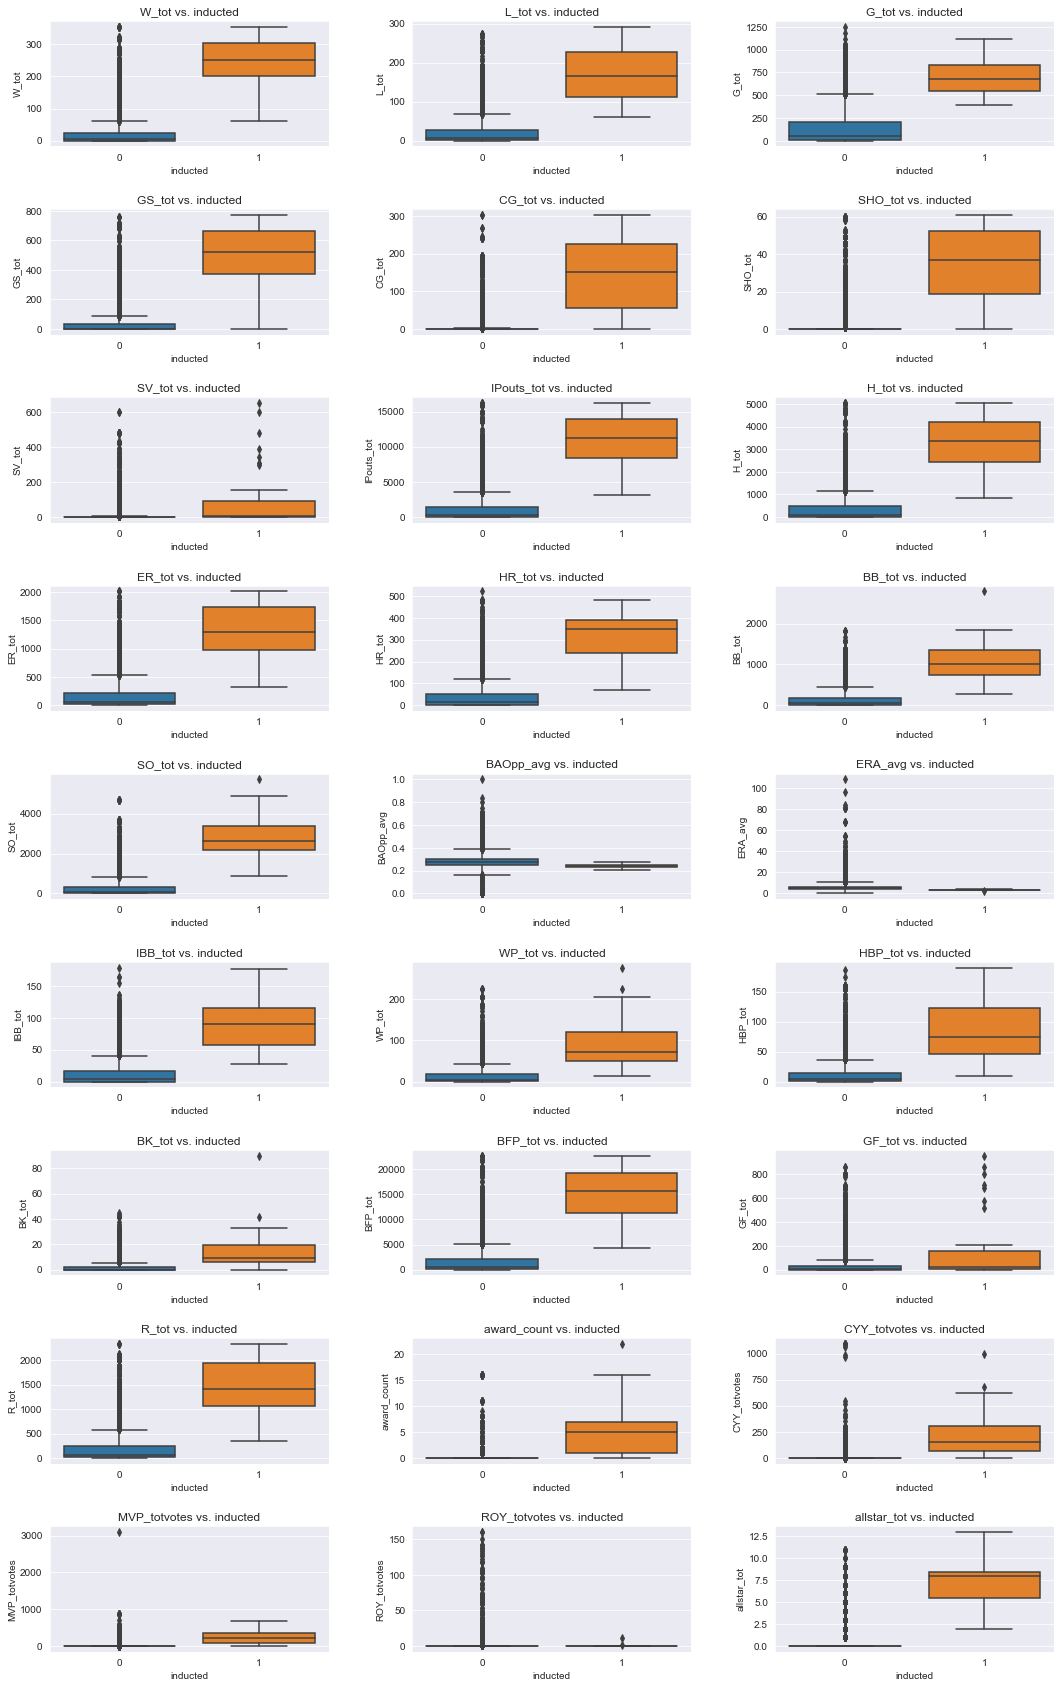

In [42]:
# Setting up box plots
sns.set_style("darkgrid")
fig, axes = plt.subplots(9, 3, figsize=(18, 30))

for i, variable in enumerate(column_names):
    # print (i)
    row = i // 3 # integer divide i by 3 (how many times does 3 go into i (discard the fraction))
                 # ex. 16 // 3 = 5 1/3 (discard the 1/3) = 5
    # print(row)
    col = i % 3 # modulo divide i by 3 times and get remainder (3 goes into )
                # ex. 16 % 3 = 16 - (3 * 5 = 15) = 1   so (row, column) is (5,1)
    # print(col)
    sns.boxplot(ax=axes[row, col], data=Pitching_Career, x='inducted', y=variable).set(title= f'{variable} vs. inducted')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
# plt.show()


In [43]:
# # creating combinations for scatterplot
# column_names_scatter
# combo_list = []
# for pair in itertools.combinations(column_names_scatter, 2):
#     #print(pair)
#     combo_list.append(tuple(pair))
#     #print(combo_list)
# print(len(combo_list))

# # enumerating the combinations for scatterplot subplots
# for ele in enumerate(combo_list):
#     print (ele)

In [44]:
#combo_list[28][0] # everything is ready just set the for loops and include for the tuples and enumeration.

In [45]:
#combo_list[0][1]

In [46]:
# lists = list(split(combo_list, 6))
# lists[0]

28
378


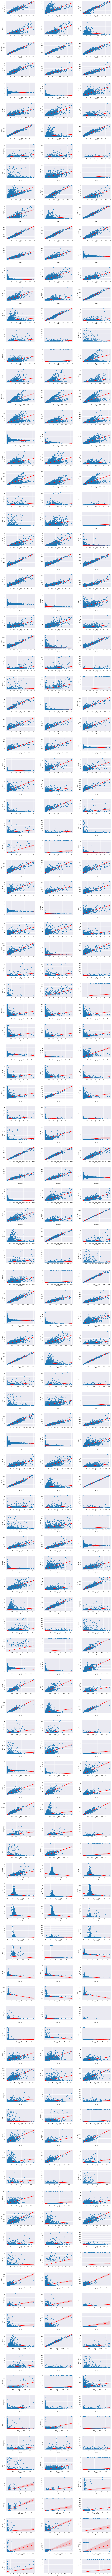

In [47]:
# setting up the scatterplot column names to be used for combinations
column_names_scatter = Pitching_Career.columns.values.tolist()
del column_names_scatter[0]
print(len(column_names_scatter))

# Plotting scatter plots for all variable combinations
sns.set_style("darkgrid")
fig, axes = plt.subplots(126, 3, figsize=(20, 500))

# creating combinations for scatterplot
column_names_scatter
combo_list = []
for pair in itertools.combinations(column_names_scatter, 2):
    #print(pair)
    combo_list.append(tuple(pair))
    #print(combo_list)
print(len(combo_list))

# dividing the combo lists into two so plots are neater.
# combo_list_split = list(split(combo_list, 2))
# combo_list1 = combo_list_split[0]
# combo_list2 = combo_list_split[1]
# combo_list3 = combo_list_split[2]
# combo_list4 = combo_list_split[3]
# combo_list5 = combo_list_split[4]
# combo_list6 = combo_list_split[5]

# enumerating the combinations for scatterplot subplots

for i, variable in enumerate(combo_list):
    # print (i)
    row = i // 3 # integer divide i by 3 (how many times does 3 go into i (discard the fraction))
                 # ex. 16 // 3 = 5 1/3 (discard the 1/3) = 5
    # print(row)
    col = i % 3 # modulo divide i by 3 times and get remainder (3 goes into )
                # ex. 16 % 3 = 16 - (3 * 5 = 15) = 1   so (row, column) is (5,1)
    # print(col)
    
    # setting up the x values
    X_value = combo_list[i][0]
    # setting up the y values
    Y_value = combo_list[i][1]
    
    # the scatter plot with regression line
    sns.regplot(x = X_value, y = Y_value, data = Pitching_Career, ax=axes[row, col], line_kws=dict(color="r"))

plt.subplots_adjust(wspace=0.3, hspace=0.5)
    

<AxesSubplot:>

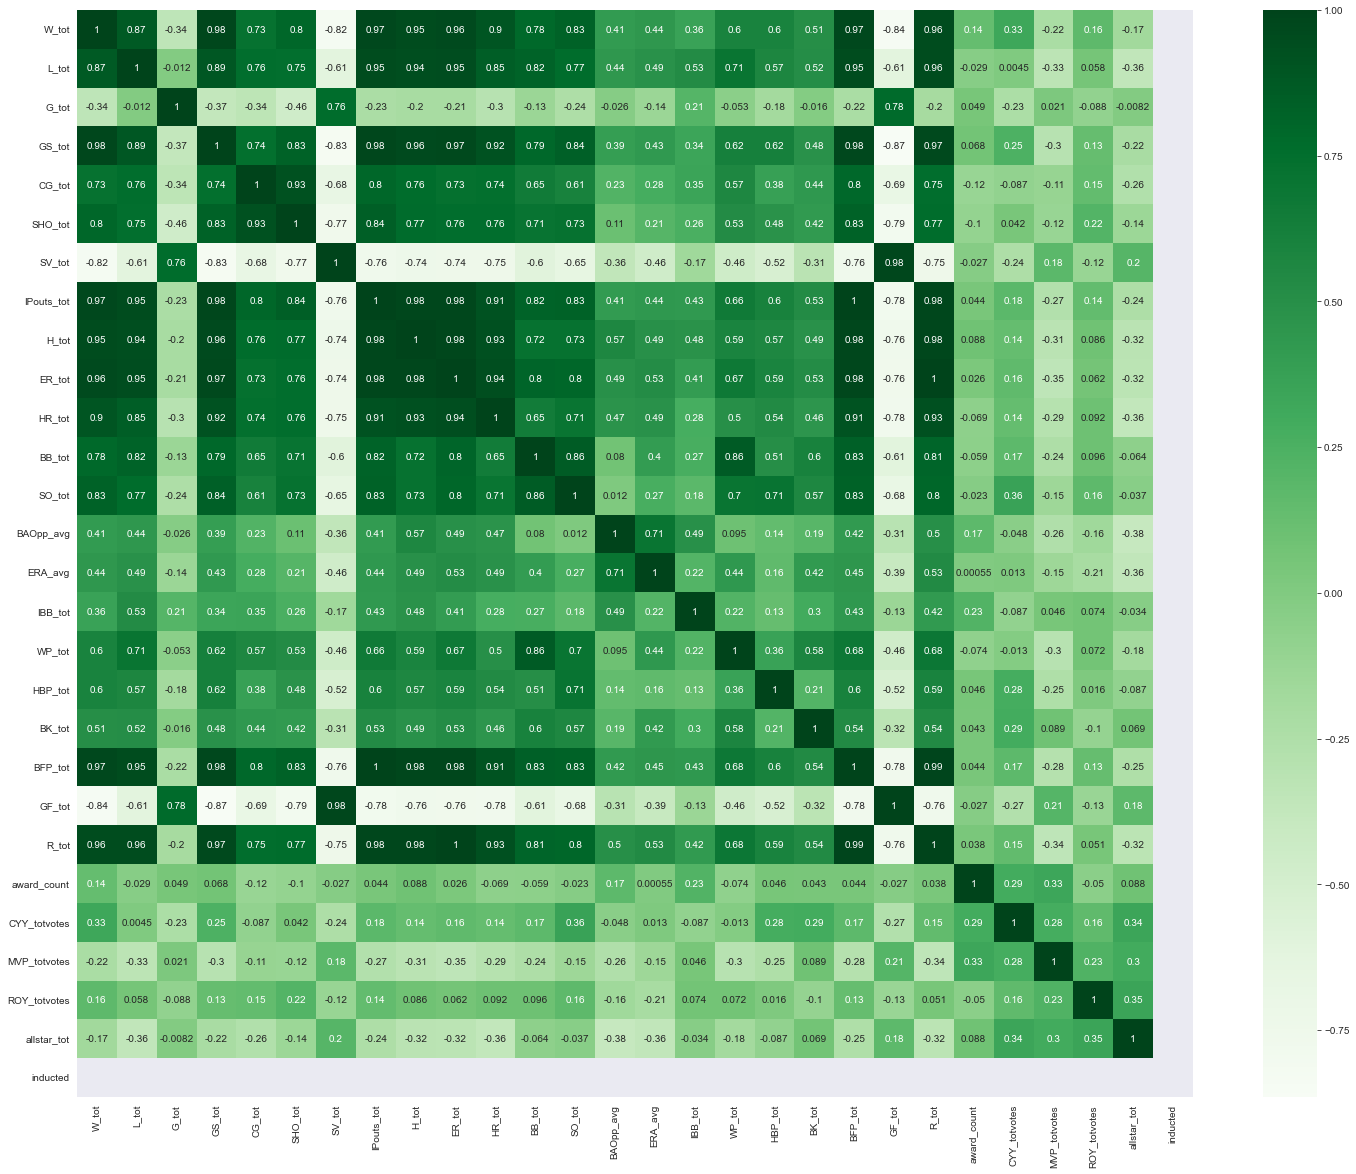

In [48]:

fig, ax = plt.subplots(figsize=(25,20)) 

matrix = Pitching_HOF_Career.corr()

#plotting correlation matrix 
sns.heatmap(matrix, cmap="Greens", annot=True)



In [49]:
# A good amount of variable combinations have large correlation values and show collinearity symptoms.
largest_10 = matrix.where(~np.tril(np.ones(
    matrix.shape, dtype=bool))).stack().nlargest(83)

print(largest_10)

smallest_10 = matrix.where(~np.tril(np.ones(
    matrix.shape, dtype=bool))).stack().nsmallest(18)

print(smallest_10)

IPouts_tot  BFP_tot    0.999408
ER_tot      R_tot      0.997913
BFP_tot     R_tot      0.986987
SV_tot      GF_tot     0.984274
ER_tot      BFP_tot    0.983513
                         ...   
SO_tot      HBP_tot    0.710115
HR_tot      SO_tot     0.708216
BAOpp_avg   ERA_avg    0.705542
L_tot       WP_tot     0.705042
SO_tot      WP_tot     0.701972
Length: 83, dtype: float64
GS_tot      GF_tot       -0.865082
W_tot       GF_tot       -0.840954
GS_tot      SV_tot       -0.831647
W_tot       SV_tot       -0.822305
SHO_tot     GF_tot       -0.793292
IPouts_tot  GF_tot       -0.780819
BFP_tot     GF_tot       -0.776433
HR_tot      GF_tot       -0.775199
SHO_tot     SV_tot       -0.767417
ER_tot      GF_tot       -0.764333
GF_tot      R_tot        -0.761670
SV_tot      IPouts_tot   -0.760904
            BFP_tot      -0.757817
H_tot       GF_tot       -0.757455
SV_tot      HR_tot       -0.748364
            R_tot        -0.745097
            ER_tot       -0.744651
            H_tot        -

A good amount of variable combinations show symptoms of Collinearity. most of these are explainable, for example IPouts_tot (Outs Pitched (innings pitched x 3)) &  BFP_tot (Batters faced by Pitcher) go hand in hand as the amount of outs pitched is directly correlated with the amount of batters faced by the pitcher. Or another example is ER_tot (ER Earned Runs) & R_tot (Runs Allowed) go hand in hand because as the number of earned runs increases the amount of runs allowed increase as well. The same reasoning can be applied to all the other varaiable combinations as most of these are directly or semi-directly related to each other. Multicollinearity can make it difficult to understand the influence of each independent variable as the infromation is redundant and adding in extra noise.

This will be taken into consideration as I decide on variables I want to test in my regressions. the two approaches I am considering are to simply remove the redundant variables, going through all of them I wonder how many I'll have left, or take the averages of the collinear variables and run my regressions from that newly created variable maybe do both and see which model performs best. I will also be checking the Variance infation factors (VIF) to check for multicollinearity.

## Hypothesis Testing

I will start by building a logistic model that utilizes all of the columns from my data and see how it performs before making changes.

One of the challenges I will face is a severe class imbalance with my data. In my population only 0.46% of the pitchers are in the hall of fame. 

In [50]:
print('Total pitchers in dataframe:' + ' ' + str(len(Pitching_Career)))
print('Number of pitchers in Hall of Fame:' + ' ' + str(len(Pitching_Career.loc[Pitching_Career['inducted'] == 1])))
print('Number of pitchers NOT in Hall of Fame:' + ' ' + str(len(Pitching_Career.loc[Pitching_Career['inducted'] == 0])))
hof_pitchers = len(Pitching_Career.loc[Pitching_Career['inducted'] == 1])
tot_pitchers = len(Pitching_Career)
percent = round(hof_pitchers/tot_pitchers * 100, 2)
print('percent of pitchers in Hall of Fame:' + ' ' + str(percent)+ '%')

Total pitchers in dataframe: 6749
Number of pitchers in Hall of Fame: 31
Number of pitchers NOT in Hall of Fame: 6718
percent of pitchers in Hall of Fame: 0.46%


In [51]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [52]:
# splitting test and training data
# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [53]:
# Setting up columns I want to use to make predictions
X = Pitching_Career[['W_tot',
 'L_tot',
 'G_tot',
 'GS_tot',
 'CG_tot',
 'SHO_tot',
 'SV_tot',
 'IPouts_tot',
 'H_tot',
 'ER_tot',
 'HR_tot',
 'BB_tot',
 'SO_tot',
 'BAOpp_avg',
 'ERA_avg',
 'IBB_tot',
 'WP_tot',
 'HBP_tot',
 'BK_tot',
 'BFP_tot',
 'GF_tot',
 'R_tot',
 'award_count',
 'CYY_totvotes',
 'MVP_totvotes',
 'ROY_totvotes',
 'allstar_tot',]]

# setting up my predicted value
y = Pitching_Career['inducted'] # indicator

In [54]:
X

W_tot  L_tot  G_tot  GS_tot  CG_tot  SHO_tot  SV_tot  IPouts_tot  H_tot  \
0        16     18    331       0       0        0      69        1011    296   
1        66     60    448      91      22        5      82        3328   1085   
2         8     29    400       6       0        0       2        1045    332   
3         0      5     23      10       0        0       0         196     64   
4        62     83    248     206      37        5       0        3858   1405   
...     ...    ...    ...     ...     ...      ...     ...         ...    ...   
6744    165    143    433     421      12        5       0        7730   2381   
6745      0      0      1       0       0        0       0           3      0   
6746      1      5     54       0       0        0       0         148     41   
6747     13     12    171       0       0        0       5         629    169   
6748      7      3     70       1       0        0       1         218     57   

      ER_tot  ...  HBP_tot  BK_tot  BFP_tot  GF_tot  R_tot  award_count  \
0        160  ...     16.0       1   1475.0     141    169          0.0   
1        468  ...      7.0       3   4730.0     235    503          0.0   
2        146  ...     12.0       2   1481.0     101    155          0.0   
3         41  ...      5.0       0    298.0       9     45          0.0   
4        627  ...     32.0       5   5508.0      13    707          0.0   
...      ...  ...      ...     ...      ...     ...    ...          ...   
6744    1157  ...     97.0       8  11001.0       9   1254          1.0   
6745       0  ...      0.0       0      5.0       1      0          1.0   
6746      29  ...      2.0       0    222.0      14     31          0.0   
6747      71  ...      4.0       0    911.0      35     80          0.0   
6748      22  ...      8.0       1    309.0      14     24          0.0   

      CYY_totvotes  MVP_totvotes  ROY_totvotes  allstar_tot  
0              0.0           0.0           0.0          0.0  
1              0.0           0.0           0.0          1.0  
2              0.0           0.0           0.0          0.0  
3              0.0           0.0           0.0          0.0  
4              0.0           0.0           0.0          0.0  
...            ...           ...           ...          ...  
6744         114.0          24.0           1.0          3.0  
6745           0.0          48.0           0.0          3.0  
6746           0.0           0.0           0.0          0.0  
6747           0.0           0.0           0.0          0.0  
6748           0.0           0.0           0.0          0.0  

[6749 rows x 27 columns]

Since my data has a huge unbalance between hall of fame ('1') and non hall of fame palyers ('0') I will be using the stratified KFold method to try to balance target variable in both training and validation test as much as possible.

In [76]:
from sklearn.model_selection import StratifiedKFold

# choosing 5 splits because the amount of hall of fame players '1' is very limited, so using the stratified 5 Folds will make assure that around the same amount of '1' labels are present in each fold.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=142)

fold = 0
aucs = []

for train_idx, val_idx in skf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]
    
    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    # Fit Model on Train
    modelLogReg = LogisticRegression(solver='liblinear',max_iter=1000)
    modelLogReg.fit(X_tr, y_tr)
    pred = modelLogReg.predict(X_val)
    pred_prob = modelLogReg.predict_proba(X_val)[:, 1]
    acc_score = accuracy_score(y_val, pred)
    auc_score = roc_auc_score(y_val, pred_prob)
    
    print(f"======= Fold {fold} ========")
    cfm = confusion_matrix(y_val.tolist(), pred.tolist(), labels=[1,0])
    print(cfm)
    print(
        f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
    )
    fold += 1
    aucs.append(auc_score)
oof_auc = np.mean(aucs)
print(f'Our out of fold AUC score is {oof_auc:0.4f}')

======= Fold 0 ========
[[   1    5]
 [   0 1344]]
Our accuracy on the validation set is 0.9963 and AUC is 0.9485
======= Fold 1 ========
[[   0    6]
 [   0 1344]]
Our accuracy on the validation set is 0.9956 and AUC is 0.9481
======= Fold 2 ========
[[   1    5]
 [   0 1344]]
Our accuracy on the validation set is 0.9963 and AUC is 0.9654
======= Fold 3 ========
[[   0    7]
 [   3 1340]]
Our accuracy on the validation set is 0.9926 and AUC is 0.8880
======= Fold 4 ========
[[   3    3]
 [   5 1338]]
Our accuracy on the validation set is 0.9941 and AUC is 0.9831
Our out of fold AUC score is 0.9466


In [75]:
modelLogReg.coef

AttributeError: 'LogisticRegression' object has no attribute 'coef'

In [ ]:
# Initialize logistic regression model
modelLogReg = LogisticRegression(solver='liblinear',max_iter=1000) # had to play around with the algorithms and iteration, settled on liblinear since I have a high dimension dataset

# Setting up the cross validation predictions

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

train_predicted = cross_val_predict(modelLogReg, X_train, y_train, cv=kfold)
print(metrics.accuracy_score(y_train, train_predicted))
print(metrics.classification_report(y_train, train_predicted))

test_predicted = modelLogReg.predict(X_test)
print(metrics.accuracy_score(y_test, test_predicted))
print(metrics.classification_report(y_test, test_predicted))


# # Initialize list to store accuracy scores for each fold
# scores = []

# # Perform 10-fold cross-validation
# for i in range(10):
#     print(i)
#     # Split data into train and test sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=None)
    
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Make predictions on the test set
#     y_pred = model.predict(X_test)
    
#     # Calculate accuracy and store the score
#     score = accuracy_score(y_test, y_pred)
#     scores.append(score)
    
#     # Setting up and Printing the Confusion Matrix
#     cfm = confusion_matrix(y_test.tolist(), y_pred.tolist())
#     print(cfm)
    
#     # Printing Classification Report
#     print(classification_report(y_test, y_pred))
    
# # Print the accuracy scores for each fold
# print("Cross-validation scores:", scores)

# # Print the mean and standard deviation of the cross-validation scores
# print("Mean accuracy:", sum(scores) / len(scores))



# print("Standard deviation of accuracy:", np.std(scores))

In [ ]:
modelLogReg

In [ ]:
X_test

In [ ]:
len(y_pred)

In [ ]:
# predict() gives a 1 or 0 
# predict_proba() gives probability

In [ ]:
# predicting non-hall of famers array of zeros against the original data. and auc for the same.
# see how model scores on hold out and just guessing all zeros. for both accuracy and auc.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
# if split too small test sample might not actually have enough test samples to predict it.
# imbalanced? use stratified kfold.
# give random state so able to compare experiments.

In [ ]:
# StratifiedKFold() wil automatically try to balance target variable in both training and validation test. important in imbalance validation set. stratified equally balance.

## Principal Component Analysis (PCA)

In [ ]:
# Prepping data for PCA
Pitching_scale = Pitching_HOF_Career.drop(columns=['playerID', 'inducted'])
#Pitching_scale.columns.values.tolist()

# Scaling all the data for PCA Transformation
scaler = StandardScaler()
scaler.fit(Pitching_scale)
scaled_data = scaler.transform(Pitching_scale)
# scaled_data

# Setting up PCA
pca = PCA()
pca.fit(scaled_data) # finding components
x_pca = pca.transform(scaled_data) # rotating and dimensionality reduction

In [ ]:
scaled_data.shape

In [ ]:
x_pca.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
# PCA Eigenvalues
variance = pca.explained_variance_

# setting up table for Eigen Values
labels = ['PC' + str(x) for x in range(1, len(pca.explained_variance_)+1)]
d = {'Label': labels, 'Eigenvalues': variance}
eigenvalues = pd.DataFrame(d)
print(eigenvalues)

# setting up plot for Eigen Values
plt.ylabel('Eigenvalues')
plt.xlabel('# of Features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(pca.explained_variance_))
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(pca.explained_variance_)

Here I have six components that have eigenvalues greater than 1 and according to Kaiser rule, drop components which eigne values are less than 1 (when data is standardized), I am keeping six components while dropping the rest

In [ ]:
# Setting up Scree Plot
plt.figure(figsize=(15,6))

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
#print(per_var)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# setting up table for  cummulative variance
cumm_per_ver = per_var.cumsum()
d = {'label':labels, 'cummulative_variance': cumm_per_ver}
explained_var = pd.DataFrame(d)
print(explained_var)

# Setting up bar plot for the variance
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

My scree plot also agrees 85% of the variance is explained in the first six components.

In [ ]:
pca = PCA(n_components=6)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

In [ ]:
pca.components_

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=Pitching_scale['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [ ]:
Pitching_HOF_Career.iloc[0,]

In [ ]:
sns.histplot(data=Pitching_HOF_Career, x="award_count", hue="inducted", multiple="dodge")

## General information

In [ ]:
# Pitching_df and hall of fame
q = '''
with p as
    (
    SELECT 
        playerID,
        MAX(yearID) as yearID
    FROM
        Pitching_df 
    GROUP BY playerID
    )
    
SELECT 
*
FROM
    p
INNER JOIN
    HallOfFame_df h
        on p.playerID = h.playerID
WHERE
h.inducted = 'Y'
AND p.yearID >= 1955
order by 2;
'''
joined = sqldf(q, locals())
print(len(joined))
joined